Copyright (C) 2024  Adam Jones  All Rights Reserved

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Affero General Public License as published
by the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

In [1]:
import figure_standard
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.gridspec as gridspec
import os

In [2]:
n_boot = 10001
figure_standard.standardize_plot_settings()
main_palette = figure_standard.create_main_palette()

In [3]:
### a
# load data
df = pd.read_excel("../2_intermediate_data/robust_noise_ma_pred.xlsx")
data_ma = pd.melt(df, id_vars=['percent'], value_vars=(['Wake_per', 'N1_per', 'N2_per', 'N3_per', 'REM_per']))
data_ma['percent'] = 100 * data_ma.percent 
data_ma['value'] = 100 * data_ma.value

In [4]:
### e
# load data
df = pd.read_excel("../2_intermediate_data/robust_noise.xlsx")
# rename columns
df = df.rename(columns={"o_kappa": "All","w_kappa": "Wake","n1_kappa": "N1","n2_kappa": "N2","n3_kappa": "N3","rem_kappa": "REM"})
data = pd.melt(df, id_vars=['type','percent'], value_vars=(['All', 'Wake', 'N1', 'N2', 'N3', 'REM']))

data_partial_epochs = data[(data.type == 'zero_epoch_ends') | (data.type == 'zero_epoch_center')].copy(deep=True)

data_partial_epochs.loc[data['type'] == 'zero_epoch_ends', 'type'] = 'silenced from ends'
data_partial_epochs.loc[data['type'] == 'zero_epoch_center', 'type'] = 'silenced from center'

data_partial_epochs['percent'] = 100 * data_partial_epochs['percent']

1 extra bytes in post.stringData array
fdsc NOT subset; don't know how to subset; dropped
fond NOT subset; don't know how to subset; dropped
just NOT subset; don't know how to subset; dropped


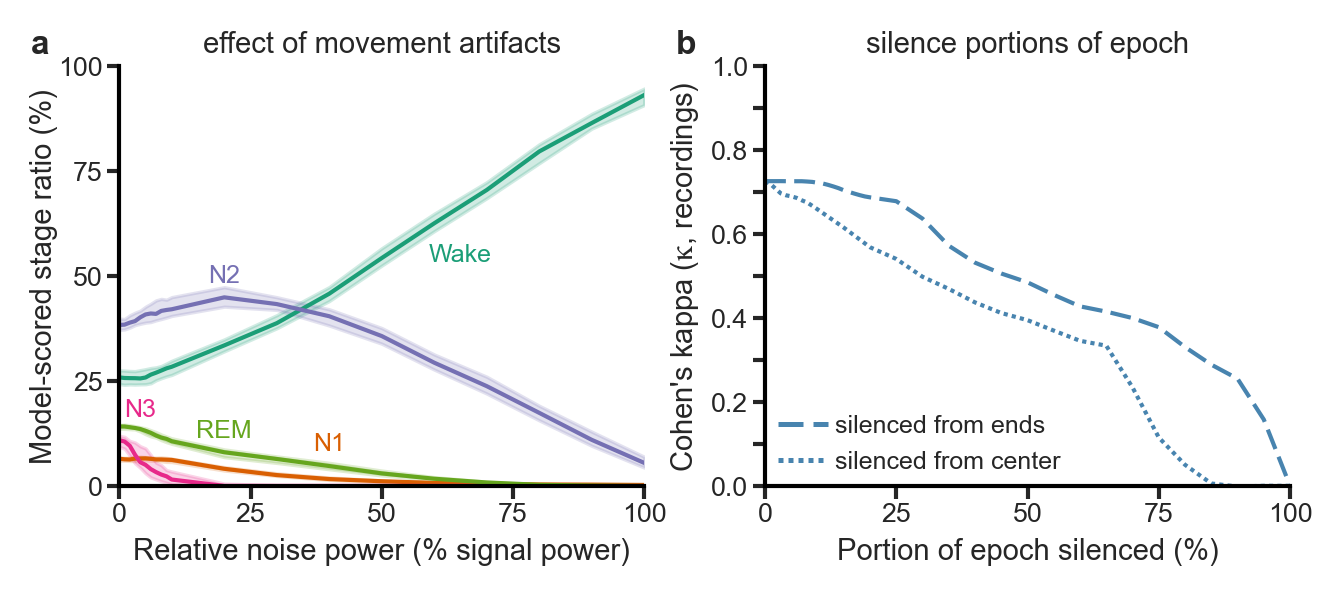

In [5]:

gs = gridspec.GridSpec(1, 2)
ax1 = plt.subplot(gs[0, 0])
ax5 = plt.subplot(gs[0, 1])


### a

ax = sns.lineplot(
    data=data_ma,
    x="percent", y="value",
    hue="variable",
    hue_order=['Wake_per', 'N1_per', 'N2_per', 'N3_per', 'REM_per'],
    palette=main_palette[1:],
    estimator='median',
    n_boot=n_boot,
    linewidth=1,
    markers=False,
    ax=ax1
)

labelpad = 2.5
ax1.set_ylabel('Model-scored stage ratio (%)', fontweight=None, labelpad=0)
ax1.set_xlabel('Relative noise power (% signal power)', fontweight=None, labelpad=labelpad)

ax1.set_ylim([0, 100])
ax1.yaxis.set_major_locator(plt.MaxNLocator(4))

ax1.set_xlim((0, 100))
ax1.xaxis.set_major_locator(plt.MaxNLocator(4))

ax1.legend().remove()

sns.despine(ax=ax1, right=True, top=True)
ax1.grid(False)
ax1.tick_params(axis='y', left=True, width=1, length=3, pad=1)
ax1.tick_params(axis='x', bottom=True, width=1, length=3, pad=1)

ax1.text(0.65, 0.55, "Wake", transform=ax1.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[1])

ax1.text(0.40, 0.10, "N1", transform=ax1.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[2])

ax1.text(0.20, 0.50, "N2", transform=ax1.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[3])

ax1.text(0.01, 0.18, "N3", transform=ax1.transAxes,
      fontsize=6, va='center', ha='left', color=main_palette[4])

ax1.text(0.20, 0.13, "REM", transform=ax1.transAxes,
      fontsize=6, va='center', ha='center', color=main_palette[5])






### e
sns.lineplot(data=data_partial_epochs[data_partial_epochs.variable == 'All'],
            x="percent", y="value",
            hue="type",
            linewidth=1,
            palette=[main_palette[0]]*2,
            style="type",
            dashes=[(5,2), (1,1)],
            ax=ax5
)

ax5.set_ylabel('Cohen\'s kappa ($\kappa$, recordings)', fontweight=None, labelpad=labelpad)
ax5.set_xlabel('Portion of epoch silenced (%)', fontweight=None, labelpad=labelpad)

ax5.set_xlim([0, 100])
ax5.xaxis.set_major_locator(plt.MaxNLocator(4))
ax5.set_ylim([0, 1])
ax5.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

for label in ax5.get_yticklabels()[1::2]:
    label.set_visible(False)

sns.despine(ax=ax5, right=True, top=True, bottom=False)
ax5.grid(False)
ax5.tick_params(axis='y', left=True, width=1, length=3, pad=1)
ax5.tick_params(axis='x', bottom=True, width=1, length=3, pad=1)

handles, labels = ax5.get_legend_handles_labels()
ax5.legend(handles=handles, labels=labels, framealpha=1, 
          title='',
          title_fontproperties={'weight':None, 'size': 6},
          alignment='left',
          loc='lower left',
          fontsize=6, ncol=1,
          borderpad=0,
          handletextpad=0.3,
          columnspacing=1)



### panel labels
panel_label_y = 1.05
panel_label_x = -0.15
panel_label_x_noaxislabel = -0.25
panel_fontsize = 8

ax1.text(panel_label_x, panel_label_y, 'a', transform=ax1.transAxes,
      fontsize=panel_fontsize, fontweight='bold', va='center', ha='center')
ax5.text(panel_label_x, panel_label_y, 'b', transform=ax5.transAxes,
      fontsize=panel_fontsize, fontweight='bold', va='center', ha='center')


panel_title_x = 0.5
title_fontsize = 7
ax1.text(panel_title_x, panel_label_y, 'effect of movement artifacts', transform=ax1.transAxes,
      fontsize=title_fontsize, fontweight=None, va='center', ha='center')
ax5.text(panel_title_x, panel_label_y, 'silence portions of epoch', transform=ax5.transAxes,
      fontsize=title_fontsize, fontweight=None, va='center', ha='center')


plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.23)
figure_standard.scale_figure_by_axes(ax1, 1.4, 1.75)

# save the figure
filename = os.path.basename(globals()["__vsc_ipynb_file__"]).replace(".ipynb", "")
figure_standard.save_figure_files(filename)